In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/Research/FU_AI_LAB/Ear_recognize/"

/content/drive/My Drive/Research/FU_AI_LAB/Ear_recognize


In [3]:
import pandas as pd
import numpy as np
import os
import cv2
import random

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
!pip uninstall tensorflow
!pip install tensorflow
!pip install --upgrade tensorflow
%tensorflow_version 2.9.x
import tensorflow as tf
tf.__version__

Found existing installation: tensorflow 2.8.2+zzzcolab20220629235552
Uninstalling tensorflow-2.8.2+zzzcolab20220629235552:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220629235552.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220629235552
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 676.3 MB 24 kB/s 
     |████████████████████████████████| 438 kB 7.2 MB/s 
     |████████████████████████████████| 5.8 MB 64.1 MB/s 
     |████████████████████████████████| 1.6 MB 47.6 MB/s 
  Attempting un

'2.9.1'

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

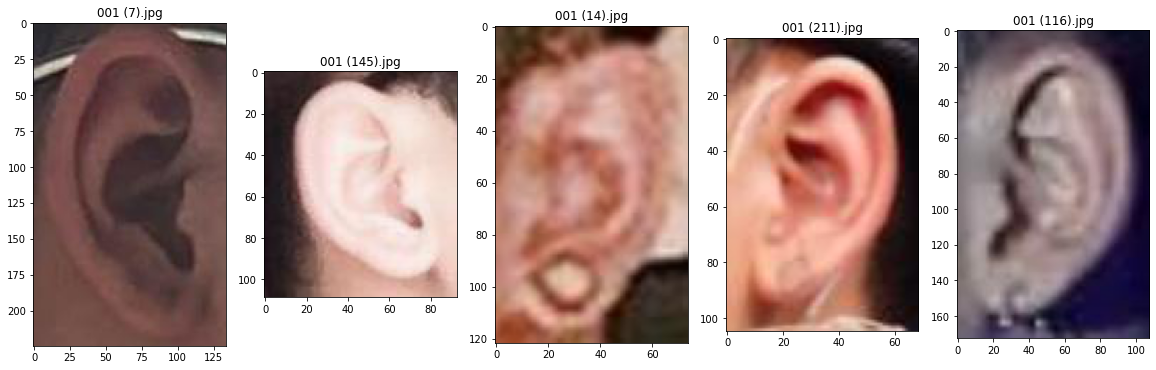

In [6]:
plt.figure(figsize=(20,20))
test_folder="./Dataset/EarVN1.0dataset/split_dataset/train/001.ALI_HD/"
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [7]:
IMG_HEIGHT = 257
IMG_WIDTH = 161
BATCH_SIZE = 32
TRAININGSET_PATH = "./Dataset/EarVN1.0dataset/split_dataset/train/"

In [8]:
train_ds = tf.data.Dataset.list_files(TRAININGSET_PATH + "*/*", shuffle=200)

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAININGSET_PATH,
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE
)

Found 22737 files belonging to 164 classes.


In [10]:
class_names = train_ds.class_names
print(class_names)

['001.ALI_HD', '002.LeDuong_BL', '003.BD_Tran', '004.Binz', '005.Bui_AT', '006.Chau_GK', '007.Chau_KP', '008.Chi_D', '009.Chi_Th', '010.Chu_B', '011.Cong_To', '012.Dai_Nhan', '013.Dam_Vinh_H', '014.Dan_Ng', '015.Dan_Trg', '016.Dang_L', '017.Dao_Ba_L', '018.De_C', '019.Don_Ng', '020.Duong_D', '021.Dustin_Phuc_Ng', '022.Duy_Kh', '023.Erik', '024.Gin_Tuan_K', '025.Ha_Anh_T', '026.Hac_Hoa_K', '027.Hamtet_Tr', '028.Ho_Quang_H', '029.Ho_Trung_D', '030.Hoai_L', '031.Hoang_Rap', '032.Huy_Tr', '033.Huynh_L', '034.Huynh_Ph', '035.Isaac', '036.Jun_Ph', '037.Justatee', '038.Kenvin_Kh', '039.KhacVi', '040.Khuong_Ng', '041.Kieu_Minh_T', '042.Kim_L', '043.L_HA', '044.Lam_Canh_T', '045.Lam_Hu', '046.Lam_Tr', '047.Lam_Vinh_H', '048.Lee_Jong_S', '049.Lee_Min_H', '050.Long_Nh', '051.Lou_Ho', '052.Luong_Bang_Q', '053.Luong_Manh_H', '054.Luong_The_Th', '055.Ly_Dich_P', '056.Mai_Tai_Ph', '057.Nam_Cuog', '058.Ngo_Diec_P', '059.Ngo_Kien_H', '060.Nguyen_Khang', '061.Nguyen_Phi_Hu', '062.Nguyen_Tran_Trung_Qu', 

(32, 257, 161, 3)
(32,)


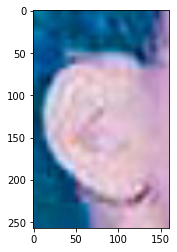

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  _ = plt.imshow(np.array(image_batch[0],np.int32))
  _ = plt.show()
  break

In [12]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [96]:
# import tensorflow as tf
# del data_augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.04166, fill_mode="nearest"),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2),
    layers.GaussianNoise(
        tf.random.uniform(shape=[],minval=0.3, maxval=0.7, dtype=tf.float32, seed=10).numpy()
    ),
])


In [97]:
aug_ds = train_ds.map(
  lambda x, y: (data_augmentation(x , training=True), y))

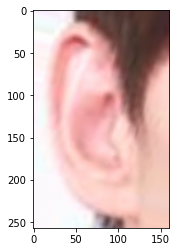

In [109]:
image_batch, labels_batch = next(iter(aug_ds))
_ = plt.imshow(np.uint8(image_batch[0]))
_ = plt.show()

In [120]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    _ = plt.imshow(np.array(image_batch[0],np.int32))
    _ = plt.show()

    image = tf.cast(tf.expand_dims(image_batch[0], 0), tf.float32)
    image = data_augmentation(image,  training=True)

    _ = plt.imshow(np.array(image[0],np.int32))
    _ = plt.show()
    break